In [32]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn


In [33]:
!python preprocess_data.py

Traceback (most recent call last):
  File "/home/anky/Documents/crime_prediction/preprocess_data.py", line 5, in <module>
    data_frame_main = pd.read_csv("data.csv")
  File "/home/anky/.local/lib/python3.10/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/home/anky/.local/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 680, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/home/anky/.local/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 575, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/home/anky/.local/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 934, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "/home/anky/.local/lib/python3.10/site-packages/pandas/io/parsers/readers.py", line 1218, in _make_engine
    self.handles = get_handle(  # type: ignore[call-overload]
  File "/home/anky/.local/lib/python3.10/site-

In [34]:
data_frame_main  = pd.read_csv("main_data.csv")

inputs = data_frame_main[['month','day','hour','dayofyear','week','weekofyear','dayofweek','weekday','quarter','latitude','longitude']]
targets = data_frame_main[['act379','act13','act279','act323','act363','act302']]


inputs_ar = np.array(inputs)
targets_ar = np.array(targets)

print(inputs.shape)

print(targets.shape)

(2067, 11)
(2067, 6)


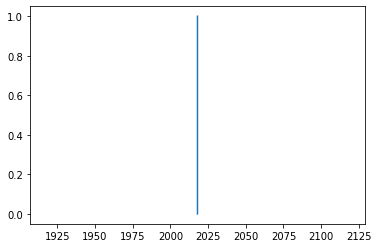

In [35]:
x = data_frame_main['year']
y = data_frame_main['act279']
plt.plot(x,y)
plt.show()

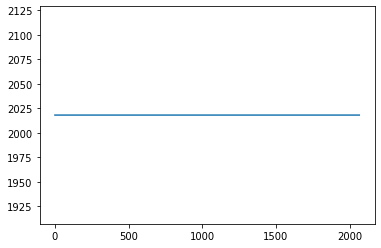

In [36]:
plt.plot(data_frame_main['year'])
plt.show()

In [37]:
no_samples,no_features = inputs_ar.shape
no_features

11

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs_ar, targets_ar, test_size=0.20)

In [40]:
inputs_train = torch.from_numpy(inputs_train.astype(np.float32))
inputs_test = torch.from_numpy(inputs_test.astype(np.float32))
targets_train = torch.from_numpy(targets_train.astype(np.float32))
targets_test = torch.from_numpy(targets_test.astype(np.float32))

In [41]:
# targets_train = targets_train.reshape(-1,1)
# targets_test = targets_test.reshape(-1,1)
print(inputs_train.shape)
print(inputs_test.shape)
print(targets_train.shape)
print(targets_test.shape)

torch.Size([1653, 11])
torch.Size([414, 11])
torch.Size([1653, 6])
torch.Size([414, 6])


In [86]:
class LogisticRegression(nn.Module):
    def __init__(self,no_of_features):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(no_of_features,10)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(10,6)
        

    def forward(self, targets_train ):
        out = self.linear1(targets_train)
        out  = self.relu(out)
        out = self.linear2(out)
        # out = self.relu(out)
        
        return out

model = LogisticRegression(no_of_features=no_features)

In [87]:
model

LogisticRegression(
  (linear1): Linear(in_features=11, out_features=10, bias=True)
  (relu): ReLU()
  (linear2): Linear(in_features=10, out_features=6, bias=True)
)

In [88]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [89]:
num_epochs = 1500*10

In [90]:
loss_hist = []
acc_hist = []
for epoch in range(num_epochs):
    targets_preds = model(inputs_train)
    loss = loss_fn(targets_preds,targets_train)

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    if(epoch+1)%10 == 0:
        with torch.no_grad():
            targets_preds = model(inputs_test)
            targets_preds_cls = targets_preds.round()
            acc = targets_preds_cls.eq(targets_test).sum() / float(inputs_test.shape[0])
            loss_hist.append(loss.item())
            acc_hist.append(acc)
            print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}, ACC: {acc}')

Epoch: 10, Loss: 60.6170, ACC: 0.45169082283973694
Epoch: 20, Loss: 56.8374, ACC: 0.3840579688549042
Epoch: 30, Loss: 53.2638, ACC: 0.36231884360313416
Epoch: 40, Loss: 49.9021, ACC: 0.35748791694641113
Epoch: 50, Loss: 46.7511, ACC: 0.35748791694641113
Epoch: 60, Loss: 43.8046, ACC: 0.36231884360313416
Epoch: 70, Loss: 41.0563, ACC: 0.3478260934352875
Epoch: 80, Loss: 38.4860, ACC: 0.3478260934352875
Epoch: 90, Loss: 36.0678, ACC: 0.32125604152679443
Epoch: 100, Loss: 33.7819, ACC: 0.28743961453437805
Epoch: 110, Loss: 31.6358, ACC: 0.2753623127937317
Epoch: 120, Loss: 29.6267, ACC: 0.3550724685192108
Epoch: 130, Loss: 27.7454, ACC: 0.4855072498321533
Epoch: 140, Loss: 25.9764, ACC: 0.5483092069625854
Epoch: 150, Loss: 24.3140, ACC: 0.5410627722740173
Epoch: 160, Loss: 22.7611, ACC: 0.483091801404953
Epoch: 170, Loss: 21.3161, ACC: 0.4227053225040436
Epoch: 180, Loss: 19.9736, ACC: 0.4468598961830139
Epoch: 190, Loss: 18.7182, ACC: 0.43719807267189026
Epoch: 200, Loss: 17.5437, ACC: 0

In [66]:
torch.save(model.state_dict(),'model/final_crime_lats.pth')

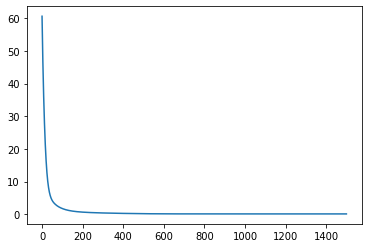

In [91]:
plt.plot(loss_hist)
plt.show()

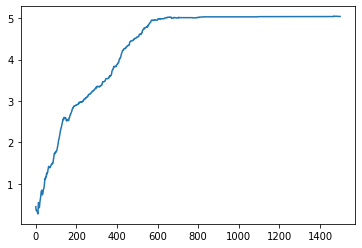

In [92]:
plt.plot(acc_hist)
plt.show()

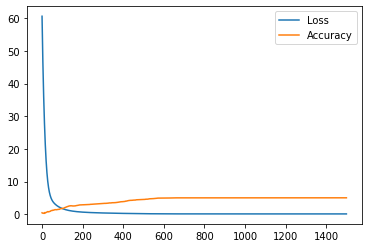

In [93]:
plt.plot(loss_hist,label="Loss")
plt.plot(acc_hist,label="Accuracy")
plt.legend()
plt.show()

In [94]:
for i in inputs_train:
    pred = model(i)
    print(pred)
    

tensor([ 0.1438,  0.0572,  0.3839,  0.3667,  0.0691, -0.0030],
       grad_fn=<AddBackward0>)
tensor([ 0.2369,  0.0354,  0.3424,  0.3190,  0.1252, -0.0013],
       grad_fn=<AddBackward0>)
tensor([ 0.2114,  0.0026,  0.1946,  0.5287,  0.0387, -0.0260],
       grad_fn=<AddBackward0>)
tensor([0.1479, 0.1102, 0.1761, 0.5241, 0.0350, 0.0021],
       grad_fn=<AddBackward0>)
tensor([0.1304, 0.1385, 0.1696, 0.5224, 0.0361, 0.0095],
       grad_fn=<AddBackward0>)
tensor([ 0.1277, -0.0243,  0.4281,  0.3290,  0.0380,  0.0092],
       grad_fn=<AddBackward0>)
tensor([0.3580, 0.0611, 0.2292, 0.2331, 0.1032, 0.0127],
       grad_fn=<AddBackward0>)
tensor([ 0.3702,  0.0780,  0.2551,  0.2139,  0.0908, -0.0071],
       grad_fn=<AddBackward0>)
tensor([0.1301, 0.1381, 0.1687, 0.5221, 0.0375, 0.0095],
       grad_fn=<AddBackward0>)
tensor([0.0975, 0.0254, 0.4177, 0.3263, 0.0387, 0.0221],
       grad_fn=<AddBackward0>)
tensor([ 0.1636,  0.0208,  0.3852,  0.3666,  0.0761, -0.0129],
       grad_fn=<AddBackward